# [112-2 多媒體技術與應用] Homework <br>

<font size = 4>
    請用.ipynb交作業，檔名用HW_學號_名稱.ipynb，例如: HW_0123456_黃大明.ipynb

## Q1 多元回歸(Multiple regression) (25%)


$$
({\bf{x}}_i,y_i) , {\bf{x}}_i = \begin{bmatrix} 1 \\ x_{i1} \\ \vdots \\ x_{id}\\ \end{bmatrix} \in R^{d+1}, \forall i=1,2,...,n 
$$

$$
{\bf{Y}} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\\ \end{bmatrix}, 
{\bf{\beta}} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n\\ \end{bmatrix},
{\bf{X}} = \begin{bmatrix} \bf{X}_1^T \\ \bf{X}_2^T  \\ \vdots \\ \bf{X}_n^T \\ \end{bmatrix}
 = \begin{bmatrix} 1&x_{11}&...&x_{1d} \\ \ 1&x_{21}&...&x_{2d}  \\ \vdots \\ \ 1&x_{n1}&...&x_{nd} \\ \end{bmatrix} 
$$

**Regression:** $$\bf{Y}=  {\bf{X}}{\bf{\beta}}$$

$$
loss({\bf{\beta}})=(\bf{Y}-\hat{\bf{Y}})^T(\bf{Y}-\hat{\bf{Y}})
$$

<font size=4 color=red>**找${\bf{\beta}}$的closed-form solution**

### Solution
$$
loss = ({y} - {x\beta})^T({y} - {x\beta}) \\
\text{     }= {y}^T{y} - {y}^T{x\beta} - {\beta}^T{x}^T{y} + {\beta}^T{x}^T{x\beta} \\
\text{     }= {y}^T{y} - 2{\beta}^T{x}^T{y} + {\beta}^T{x}^T{x\beta} \\
\text{ } \\
\frac{\partial loss}{\partial \beta} = 0 - 2{x}^T{y} + 2{x}^T{x\beta} \\
\Rightarrow {x}^T{y} = {x}^T{x\beta} \\
\Rightarrow ({x}^T{x})^{-1}{x}^T{y} = ({x}^T{x})^{-1}{x}^T{x\beta} \\
\Rightarrow {\beta} = ({x}^T{x})^{-1}{x}^T{y}
$$

## Q2. 依據第Q1推出的公式做python程式(Numpy)撰寫 ，寫一個Multiple regression  (25%)<br>
Data在HW-RegressionExample.txt，第1欄是dependent variable(${\bf{Y}}$), 第2~5欄是independent variable(${\bf{X}}$)。<br><br>
<font size=4 color=red> 請用python print出算出來的$\beta$結果。</font>

In [2]:
import numpy as np

f = open("RegressionExample.txt", 'r').readlines()
y, x = [], []
for data in f:
    oneline = data.strip().replace("\n", "")
    oneline = oneline.split(" ")
    y.append(oneline[0])
    x.append(["1"] + oneline[1:5])

np_y = np.array(y).astype(int)
np_x = np.array(x).astype(int)
beta = np.dot(np.dot(np.linalg.inv(np.dot(np_x.T, np_x)), np_x.T), np_y)
print("Beta is : ", beta)

Beta is :  [ 1.73076755e+05  2.08912425e+02  2.70143840e-03 -5.45496545e-02
 -2.56136082e+02]


## Q3 (50%)
<font size=3>
  
讀取「data_weight_multlfeatutes.xlsx」<br>
利用<font color=red>'身高', '體重'</font>當作自變數(X)<br>
<font color=red>'性別'</font>作為依變數(Y)。<br>
        
利用Pytorch寫一個簡單的羅吉斯回歸(logistic regression)分類(訓練X，然後評估訓練後X的正確率)<br>

$$
y_{hat} = \sigma(\beta_1 \times x_{身高}+\beta_2 \times x_{體重} + \beta_0)
$$
    

進行求解  <br>

1. 學習率0.1，學習次數10000次<br>
2. 學習率0.01，學習次數10000次<br>

I. 在每個實驗中都要劃出loss的變化(10%) <br> 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$(10%)<br> 
III. 劃出模型Decision Boundary的熱點圖。(20%)<br> 

3. 說明一下你看到的現象。 (10%)

    
-------------------------
以下為Hint<br>
訓練模型前請設定下面的random seed
```
import torch
torch.manual_seed(202404)
```
'身高': 前處理先除上200<br>
'體重': 前處理先除上100

print最後解的羅吉斯回歸的$\beta$   
```
print(model.linear.weight)
print(model.linear.bias)
```
理論上求出來的解如下:
    

I. 在每個實驗中都要劃出loss的變化<br>
loss = torch.nn.BCELoss()
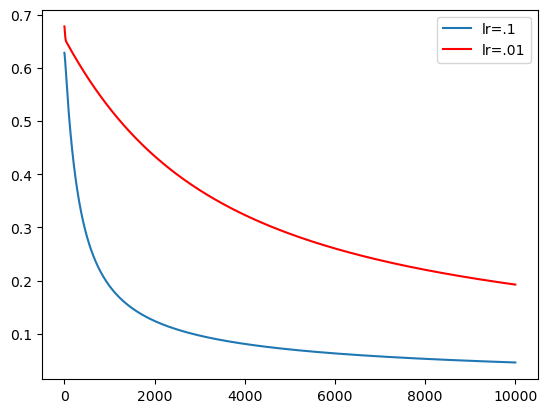  
 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$<br>
    
|learning rate|$\beta_0$| $\beta_1$| $\beta_2$|
|:-:|:-:|:-:|:-:|
|0.1|-29.9621|5.0617| 41.4960|    
|0.01|-11.0679| 1.2951| 16.4604|   

III. 劃出模型Decision Boundary的熱點圖。<br> 
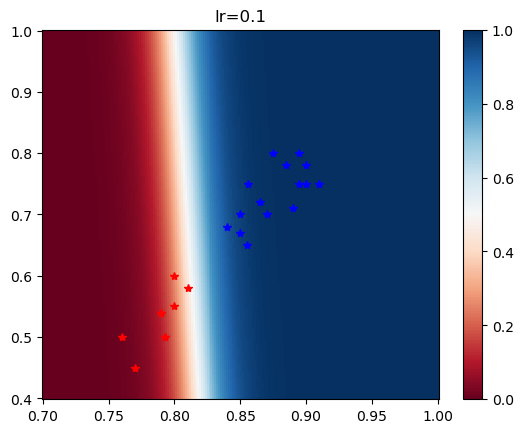
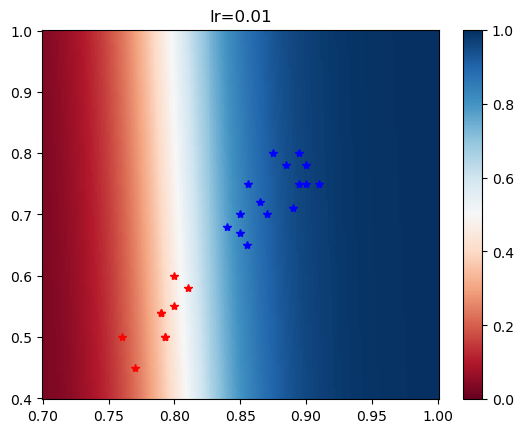

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


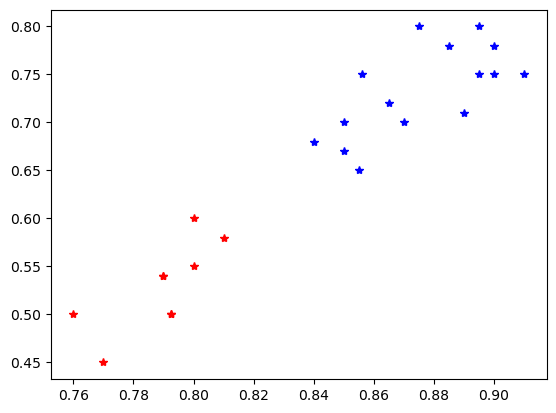

In [1]:
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

def load_classification_example():
    filename='.\data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    df["性別"] = labelencoder.fit_transform(df["性別"]) # 將"性別"裡的字串自動轉換成數值
    df["手機品牌"] = labelencoder.fit_transform(df["手機品牌"]) # 將"手機品牌"裡的字串自動轉換成數值
    X = np.array(df[['身高', '體重', '手機品牌','體脂肪']])
    Y = np.array(df['性別'])
    return X, Y
data, target = load_classification_example()

data[:,0]=data[:,0]/200
data[:,1]=data[:,1]/100
data=data[:,0:2]

pos0=np.where(target==0)[0]
pos1=np.where(target==1)[0]
plt.figure()
plt.plot(data[pos0,0],data[pos0,1],'r*')
plt.plot(data[pos1,0],data[pos1,1],'b*')
plt.show()
'''

### Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import torch
import torch.utils.data

### Data Processing

In [9]:
def load_classification_example():
    filename = 'data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    df["性別"] = labelencoder.fit_transform(df["性別"])
    df["手機品牌"] = labelencoder.fit_transform(df["手機品牌"])
    X = np.array(df[['身高', '體重']])
    Y = np.array(df['性別'])
    return X, Y

np_data, target = load_classification_example()
np_data[: ,0] = np_data[: ,0] / 200
np_data[: ,1] = np_data[: ,1] / 100

### Torch Setting

In [10]:
torch.manual_seed(202404)
enable_cuda = False
device = torch.device("cuda" if torch.cuda.is_available() and enable_cuda else "cpu")

### Create Torch Tensor, class of Model, Loss function and Optimizer

In [11]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

data = torch.FloatTensor(np_data)
target = torch.FloatTensor(target).view(-1, 1)
dataset = torch.utils.data.TensorDataset(data, target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=data.shape[0], shuffle=True)
model1 = Model().to(device)
model2 = Model().to(device)
loss = torch.nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1, momentum=0.9)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.01, momentum=0.9)

### Training Data

In [12]:
loss_model_1 = []
loss_model_2 = []

model1.train()
for epoch in range(10000):
    nowLoss = None
    for data, target in dataloader:
        data = data.to(device)
        target = target.to(device)
        output1 = model1(data)
        nowLoss = loss(output1, target)
        optimizer1.zero_grad()
        nowLoss.backward()
        optimizer1.step()
    loss_model_1.append(nowLoss.item())
    
model2.train()
for epoch in range(10000):
    nowLoss = None
    for data, target in dataloader:
        data = data.to(device)
        target = target.to(device)
        output2 = model2(data)
        nowLoss = loss(output2, target)
        optimizer2.zero_grad()
        nowLoss.backward()
        optimizer2.step()
    loss_model_2.append(nowLoss.item())

### Print the Beta

In [13]:
print("learning rate is 0,1 :")
print(f"beta_0 = {model1.linear.bias.item(): .4f}")
print(f"beta_1 = {model1.linear.weight[0][0].item(): .4f}")
print(f"beta_2 = {model1.linear.weight[0][1].item(): .4f}")

print("learning rate is 0.01:")
print(f"beta_0 = {model2.linear.bias.item(): .4f}")
print(f"beta_1 = {model2.linear.weight[0][0].item(): .4f}")
print(f"beta_2 = {model2.linear.weight[0][1].item(): .4f} ")

learning rate is 0,1 :
beta_0 = -29.9621
beta_1 =  5.0617
beta_2 =  41.4960
learning rate is 0.01:
beta_0 = -11.0679
beta_1 =  1.2951
beta_2 =  16.4604 


### Plot loss of l.r. 0.1 and 0.01

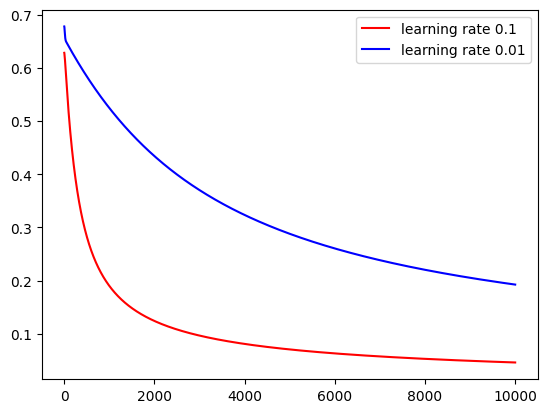

In [14]:
plt.figure()
plt.plot(loss_model_1, label = "learning rate 0.1", color = "red")
plt.plot(loss_model_2, label = "learning rate 0.01", color = "blue")
plt.legend()
plt.show()

### Plot Decision Boundary 

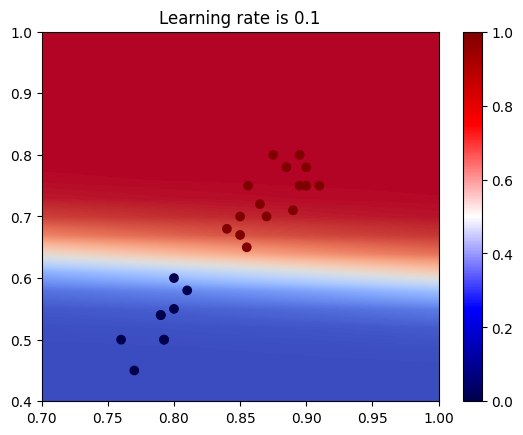

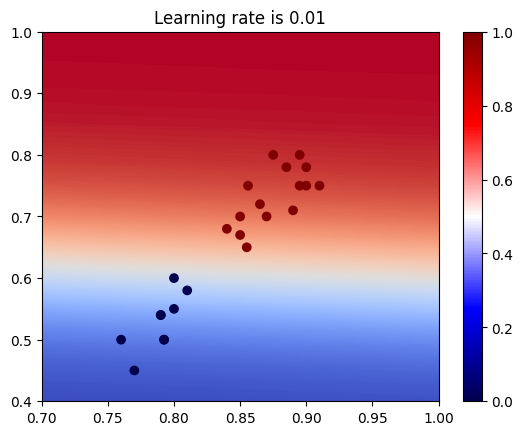

In [15]:
x_min, x_max = 0.7, 1.0
y_min, y_max = 0.4, 1.0
size_grid = 0.03
grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max + size_grid, size_grid),
                             np.arange(y_min, y_max + size_grid, size_grid))
grids = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grids = torch.FloatTensor(grids).to(device)

plt.figure()
axis = plt.gca()
axis.set_xlim([x_min, x_max])
axis.set_ylim([y_min, y_max])
with torch.no_grad():
    output = model1(grids)
    axis.contourf(grid_x, grid_y, output.reshape(grid_x.shape), cmap="coolwarm", levels=500)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap="seismic")
plt.title("Learning rate is 0.1")
plt.colorbar()
plt.show()

plt.figure()
axis = plt.gca()
axis.set_xlim([x_min, x_max])
axis.set_ylim([y_min, y_max])
with torch.no_grad():
    output = model2(grids)
    axis.contourf(grid_x, grid_y, output.reshape(grid_x.shape), cmap="coolwarm", levels=500)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap="seismic")
plt.title("Learning rate is 0.01")
plt.colorbar()
plt.show()